## Cleaning and exploration of medical insurance data

#### Importing required modules

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

#### Reading and describing the data

In [151]:
df = pd.read_csv("medical_insurance.csv")

In [152]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking for null values

In [153]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [154]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [155]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(df[feature].value_counts())
    print("\n")

Distribution of sex
male      1406
female    1366
Name: sex, dtype: int64


Distribution of smoker
no     2208
yes     564
Name: smoker, dtype: int64


Distribution of region
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64




In [156]:
df.groupby(['sex']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})


charges                      bmi        age
         count          mean       mean       mean
sex                                               
female    1366  12486.831977  30.434473  39.481698
male      1406  14013.872721  30.960633  38.748222

In [157]:
df.groupby(['children']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
           count          mean       mean       mean
children                                            
0           1186  12317.920881  30.628508  38.431703
1            672  12722.650521  30.705744  39.300595
2            496  15268.182723  31.035806  39.286290
3            324  15304.070620  30.580000  41.395062
4             52  13550.983876  31.314615  38.769231
5             42   8706.036629  28.915000  35.904762

In [158]:
df.groupby(['region']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
            count          mean       mean       mean
region                                               
northeast     658  13475.874737  29.157781  39.243161
northwest     664  12463.129315  29.147259  39.081325
southeast     766  14748.777706  33.478773  38.762402
southwest     684  12164.196435  30.584503  39.397661

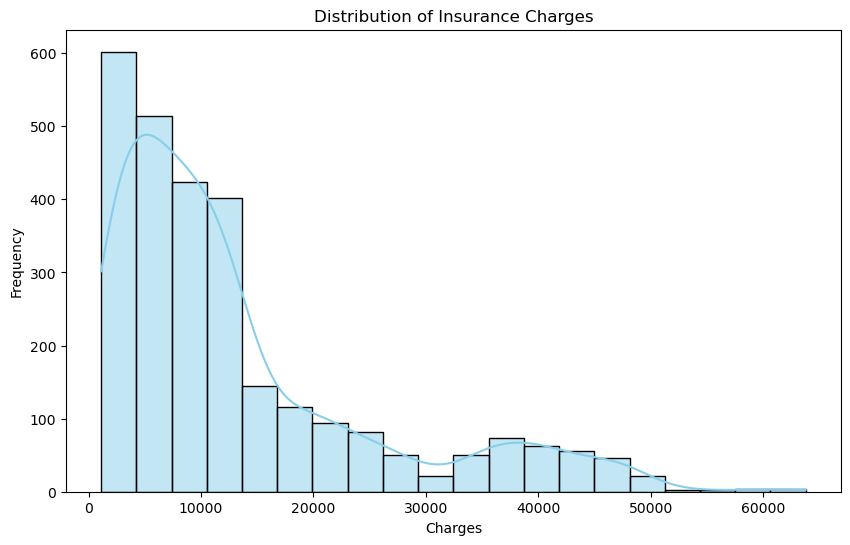

In [159]:
sns.histplot(df['charges'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

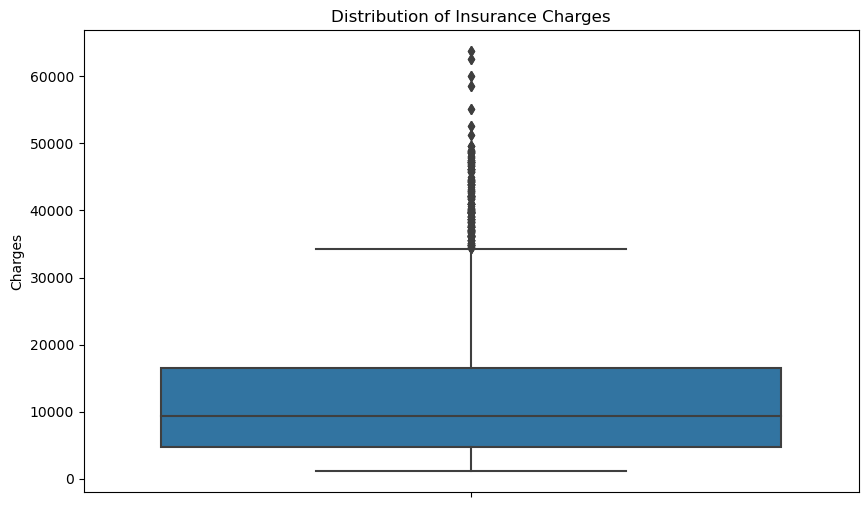

In [160]:
sns.boxplot(y='charges', data=df)
plt.title('Distribution of Insurance Charges')
plt.ylabel('Charges')
# plt.ylabel('Frequency')
plt.show()

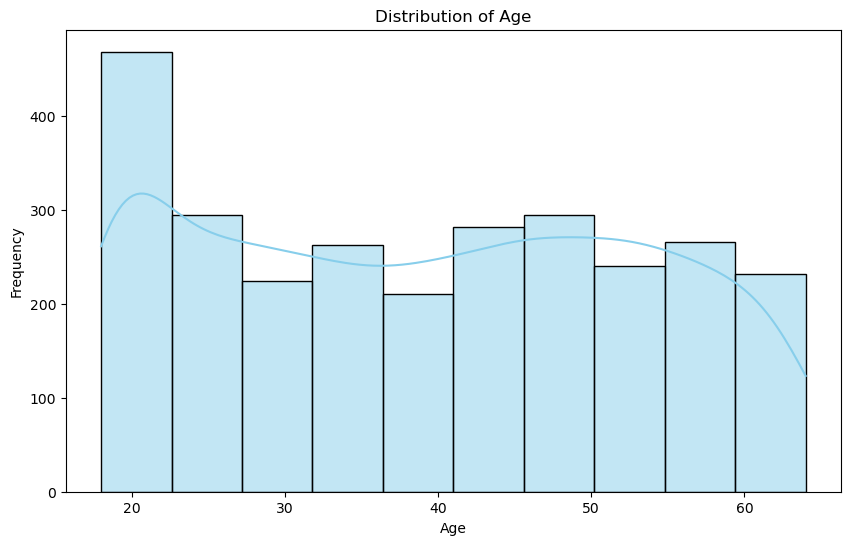

In [161]:
sns.histplot(df['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

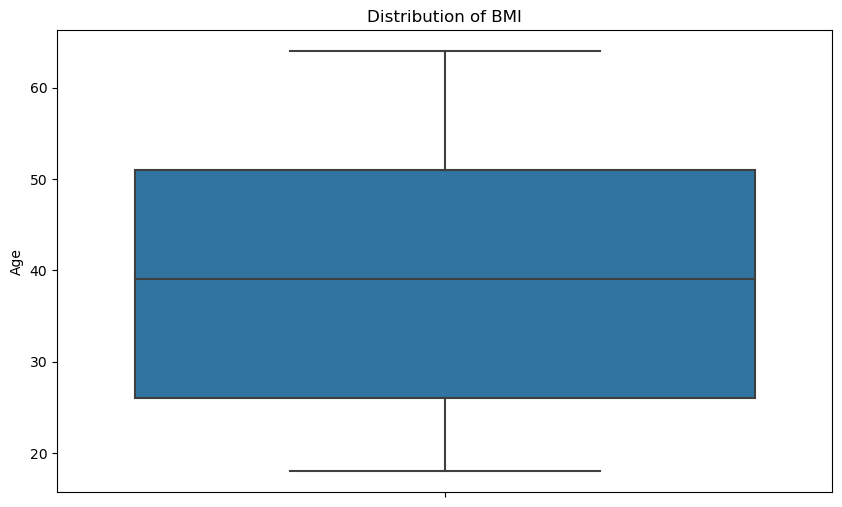

In [162]:
sns.boxplot(y='age', data=df)
plt.title('Distribution of BMI')
plt.ylabel('Age')
# plt.ylabel('Frequency')
plt.show()

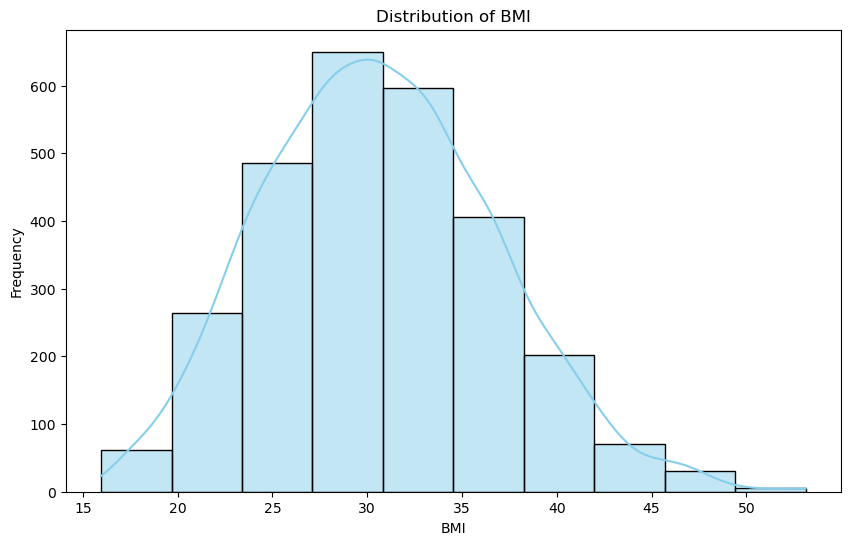

In [163]:
sns.histplot(df['bmi'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

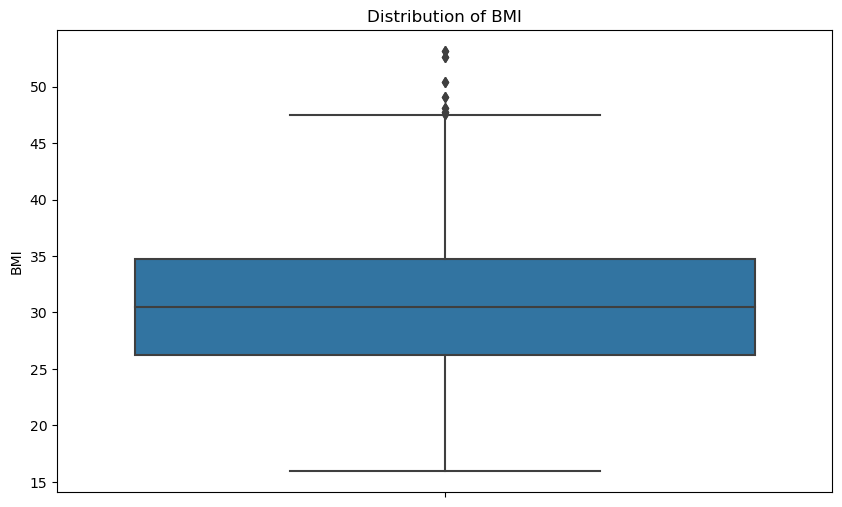

In [164]:
sns.boxplot(y='bmi', data=df)
plt.title('Distribution of BMI')
plt.ylabel('BMI')
# plt.ylabel('Frequency')
plt.show()

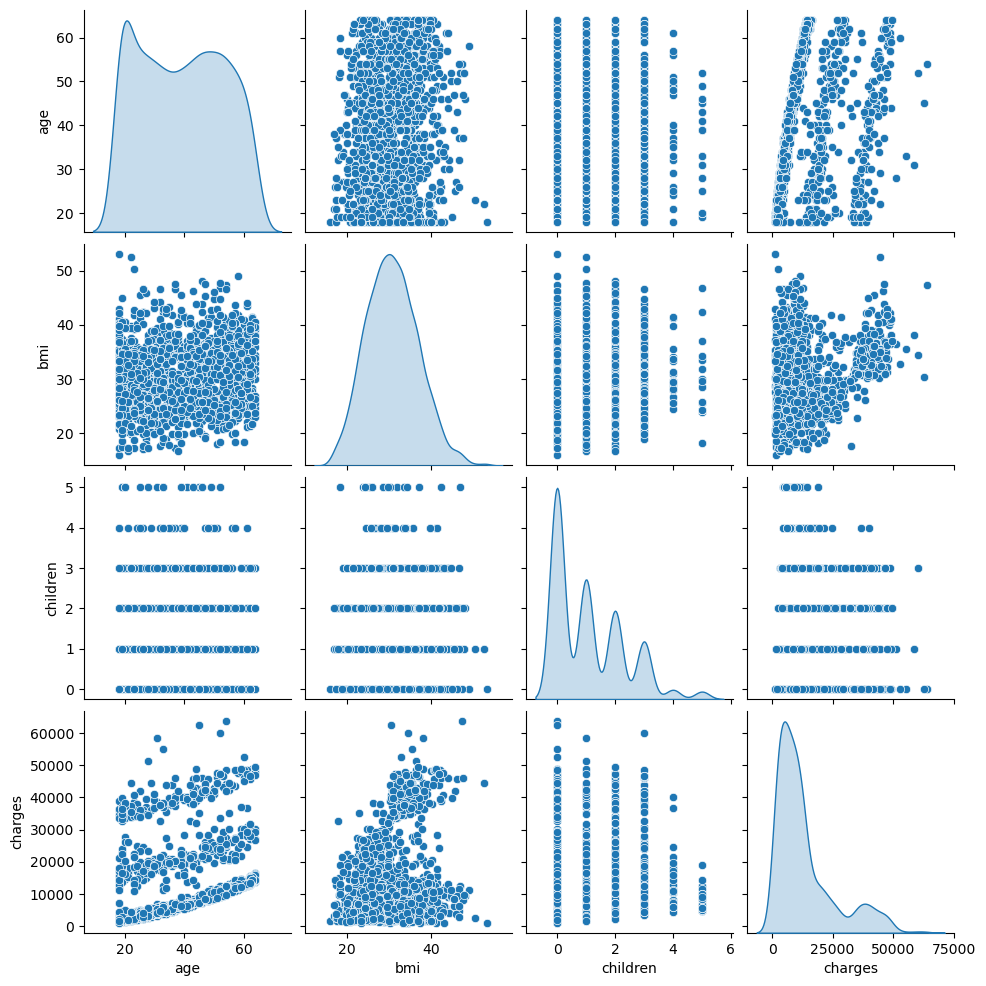

In [165]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [166]:
categorical_features = ['sex', 'smoker', 'region']

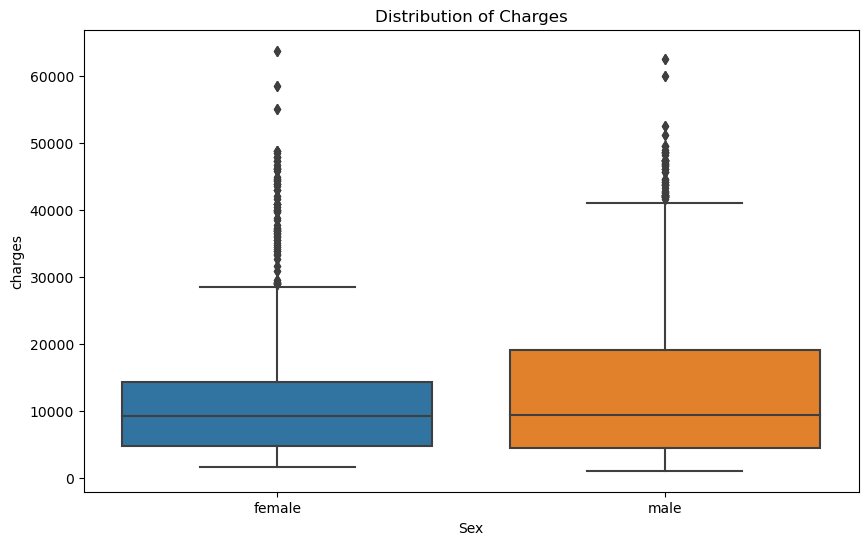

In [167]:
sns.boxplot(y='charges', x= "sex", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

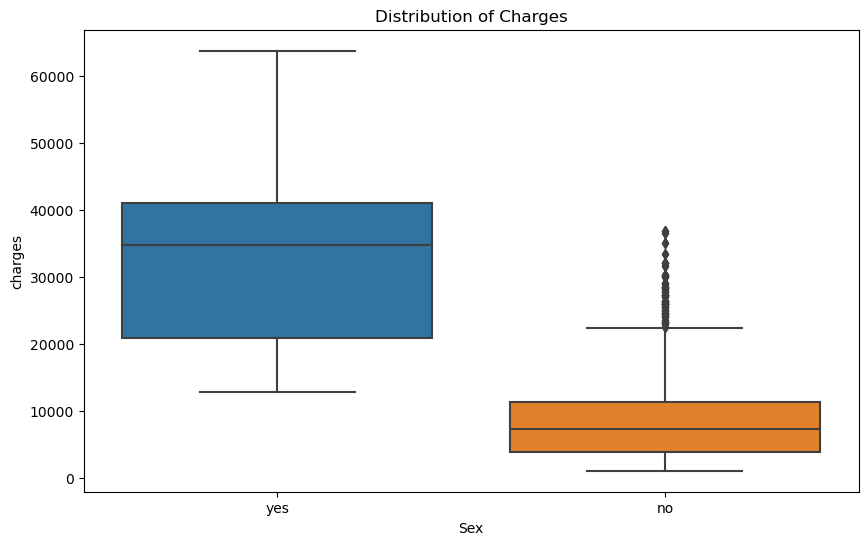

In [168]:
sns.boxplot(y='charges', x= "smoker", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

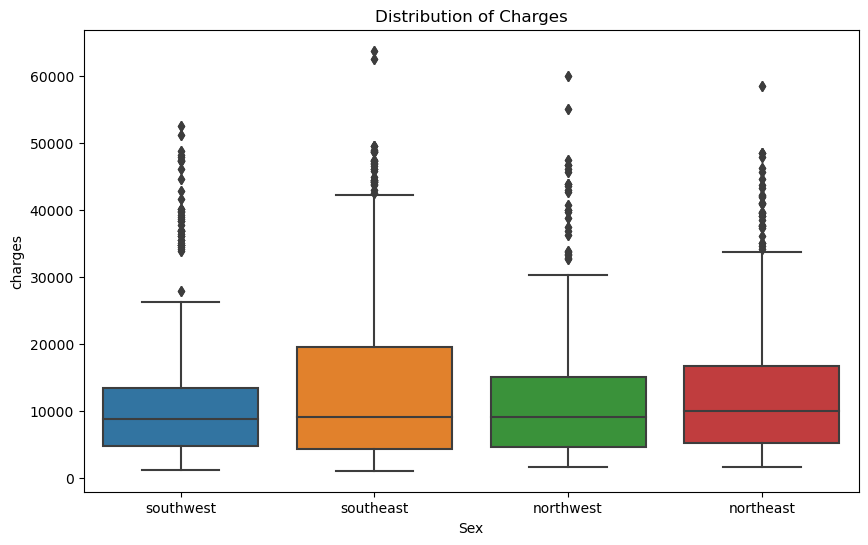

In [169]:
sns.boxplot(y='charges', x= "region", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

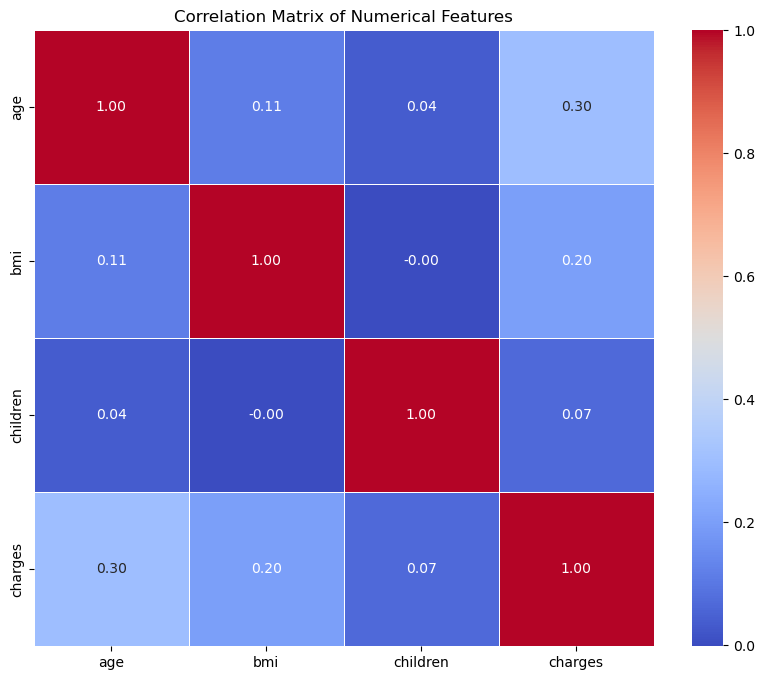

In [170]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Scaling Y and see if it becomes normal

In [171]:
scaler = StandardScaler()
print(scaler.fit(df[['age','bmi','children','charges']]))

StandardScaler()


In [172]:
print(scaler.mean_)

[3.91096681e+01 3.07013492e+01 1.10173160e+00 1.32613700e+04]


In [173]:
scaled_df = scaler.transform(df[['age','bmi','children','charges']])

In [174]:
scaled_df = pd.DataFrame(scaled_df, columns=('sc_age','sc_bmi','sc_children','sc_charges'))

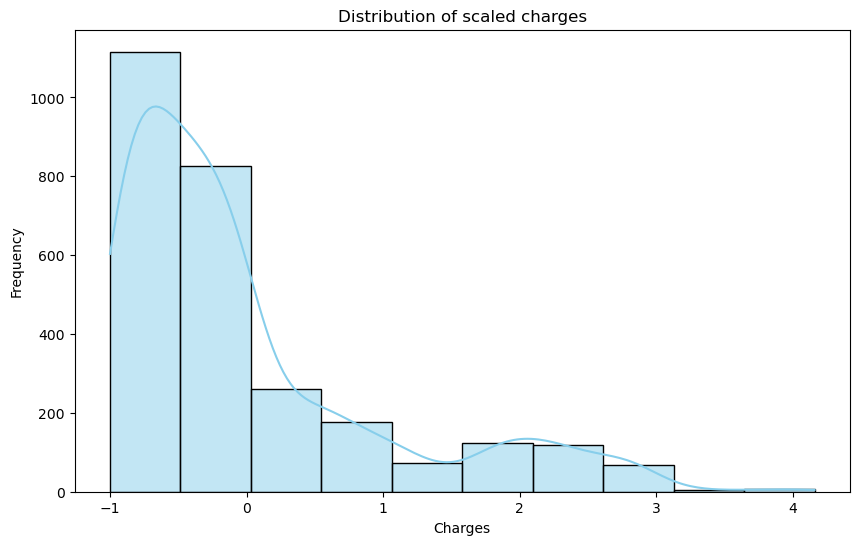

In [175]:
sns.histplot(scaled_df['sc_charges'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of scaled charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [176]:
scaled_df

,sc_age,sc_bmi,sc_children,sc_charges
0,-1.428353,-0.457114,-0.907084,0.298245
1,-1.499381,0.500731,-0.083758,-0.949483
2,-0.789099,0.375085,1.562893,-0.725285
3,-0.433959,-1.304814,-0.907084,0.717976
4,-0.504987,-0.297201,-0.907084,-0.773238
...,...,...,...,...
2767,0.560436,2.385417,-0.083758,-0.386146
2768,-1.286297,0.636167,-0.907084,-0.925233
2769,-1.428353,-0.762253,-0.083758,0.262521
2770,-1.144240,-1.955887,-0.907084,0.685951


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [178]:
data_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,southeast,8569.86180
2768,21,0,34.600,0,0,southwest,2020.17700
2769,19,1,26.030,1,1,northwest,16450.89470
2770,23,1,18.715,0,0,northwest,21595.38229


In [179]:
data_encoded = df.copy()
OHencoder = OneHotEncoder(sparse=False)
new_df = OHencoder.fit_transform(data_encoded[['region']])
en_df = pd.DataFrame(new_df, columns=("northeast","northwest","southeast","southwest"))

In [180]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
data_encoded['sex'] = label_encoder.fit_transform(df['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])

In [181]:
cat_encoded = data_encoded.join(en_df)

In [182]:
cat_encoded.drop(columns=["age", "bmi", "region", "charges", "northeast", "children"], inplace=True)

In [184]:
final_scaled_data = cat_encoded.join(scaled_df)

In [185]:
cols_float = ["northwest","southeast","southwest"]
final_scaled_data[cols_float] = final_scaled_data[cols_float].applymap(np.int64)

In [186]:
final_scaled_data.head()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges
0,0,1,0,0,1,-1.428353,-0.457114,-0.907084,0.298245
1,1,0,0,1,0,-1.499381,0.500731,-0.083758,-0.949483
2,1,0,0,1,0,-0.789099,0.375085,1.562893,-0.725285
3,1,0,1,0,0,-0.433959,-1.304814,-0.907084,0.717976
4,1,0,1,0,0,-0.504987,-0.297201,-0.907084,-0.773238


In [187]:
# Separate features (X) and target variable (y)
X = final_scaled_data.drop('sc_charges', axis=1)
y = final_scaled_data['sc_charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Compute the Mean Squared Error (MSE) of the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)

Mean Squared Error (Linear Regression): 0.27100870410512257


In [188]:
lr_model.coef_

array([-0.00286313,  1.95273863, -0.04201374, -0.08153357, -0.0830413 ,
        0.29853059,  0.16157424,  0.05086167])

In [189]:
lr_model.feature_names_in_

array(['sex', 'smoker', 'northwest', 'southeast', 'southwest', 'sc_age',
       'sc_bmi', 'sc_children'], dtype=object)

In [190]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [191]:
r_sqr = lr_model.score(X_test, y_test)

In [192]:
print(f"intercept: {lr_model.intercept_}")

print(f"slope: {lr_model.coef_}")

intercept: -0.3527110888046052
slope: [-0.00286313  1.95273863 -0.04201374 -0.08153357 -0.0830413   0.29853059
  0.16157424  0.05086167]


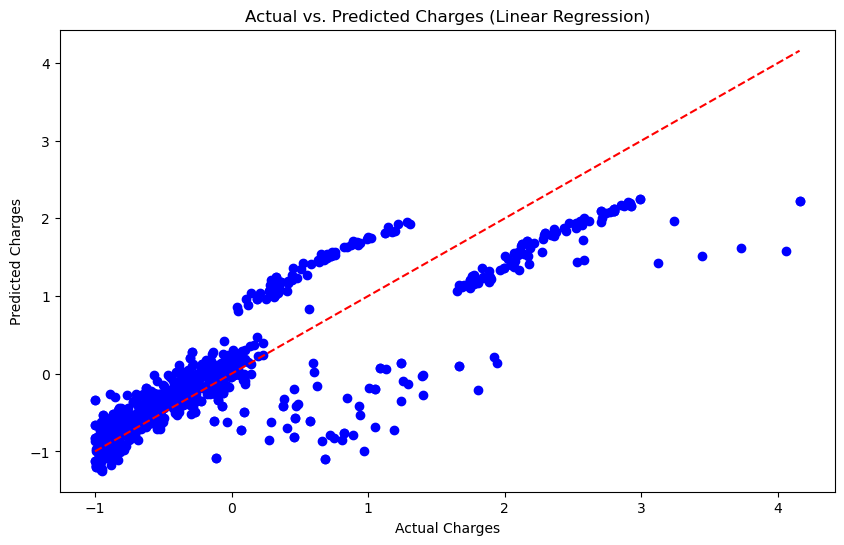

In [193]:
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()


In [194]:
lr_predictions

array([-2.51613687e-01,  1.93076943e+00, -3.40169769e-01, -6.15569036e-01,
       -5.52744372e-01,  1.70846611e+00, -6.24967209e-01,  2.11919093e+00,
       -1.33005866e-01, -8.27690994e-01, -3.11917049e-02, -2.67933899e-02,
       -6.62012944e-01, -1.61839552e-01, -7.42704629e-01, -4.22328322e-01,
       -2.69746087e-01, -3.17113328e-01, -6.96065958e-01, -7.86452031e-01,
       -3.56799766e-02,  1.61874355e+00,  1.42351635e+00,  2.16194304e+00,
        1.14113808e+00, -3.06298607e-01, -1.21871275e+00,  2.73977768e-01,
       -4.20415446e-01, -1.12836477e+00,  9.06406500e-02, -7.80995174e-01,
       -8.73066572e-01, -9.06679234e-01,  1.36660714e-01, -1.11418490e-01,
       -9.47843200e-01, -9.06536176e-01, -4.18112419e-01,  1.53533614e+00,
       -5.90654895e-01, -2.92272638e-01,  9.67071606e-02, -5.32014030e-01,
       -1.08310145e+00,  2.22861892e+00, -7.54181152e-01,  1.81157327e+00,
       -6.65859085e-01, -5.01100455e-01,  1.87231116e+00, -3.02667991e-01,
       -8.06837382e-01, -

In [235]:
train_pred_df = X_train.copy()

In [236]:
train_pred_df['sc_charges'] = y_train.to_list()

In [237]:
train_pred_df['sc_charges_pred'] = lr_model.predict(X_train)

In [238]:

train_origin = scaler.inverse_transform(train_pred_df[['sc_age','sc_bmi','sc_children','sc_charges']])

In [240]:
train_origin = pd.DataFrame(train_origin, columns=['age','bmi','children','charges'], index=train_pred_df.index)

In [241]:
train_pred_df = train_pred_df.join(train_origin, rsuffix='_origin')

In [242]:
train_pred_df

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges
1684,1,1,1,0,0,-0.576015,0.601900,1.562893,2.097603,1.559935,31.0,34.390,3.0,38746.35510
862,0,0,1,0,0,1.128661,0.462384,0.739567,-0.081623,0.054540,55.0,33.535,2.0,12269.68865
1992,0,0,0,0,0,-0.860128,-0.901769,-0.907084,-0.798608,-0.801324,27.0,25.175,0.0,3558.62025
889,1,0,1,0,0,1.270718,0.477886,-0.083758,-0.108336,0.054714,57.0,33.630,1.0,11945.13270
1362,1,0,0,1,0,0.134267,0.572528,-0.083758,-0.573815,-0.308779,41.0,34.210,1.0,6289.75490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,1,0,1,0,1.057633,0.572528,0.739567,2.551478,1.961488,54.0,34.210,2.0,44260.74990
1095,0,0,0,0,0,-1.499381,0.105844,2.386218,-0.716089,-0.661854,18.0,31.350,4.0,4561.18850
1130,0,0,0,1,0,-0.007790,-1.114714,3.209543,-0.385122,-0.453436,39.0,23.870,5.0,8582.30230
1294,1,0,0,0,0,1.341746,-0.901769,-0.907084,-0.109489,-0.146860,58.0,25.175,0.0,11931.12525


In [243]:
train_pred = scaler.inverse_transform(train_pred_df[['sc_age','sc_bmi','sc_children','sc_charges_pred']])
train_pred = pd.DataFrame(train_pred, columns=['age','bmi','children','charges'], index=train_pred_df.index)

In [244]:
train_pred_df = train_pred_df.join(train_pred, rsuffix='_pred')

In [246]:
train_pred_df.drop(columns=['age_pred','bmi_pred','children_pred'], inplace=True)

In [247]:
train_pred_df

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges,charges_pred
1684,1,1,1,0,0,-0.576015,0.601900,1.562893,2.097603,1.559935,31.0,34.390,3.0,38746.35510,32213.925892
862,0,0,1,0,0,1.128661,0.462384,0.739567,-0.081623,0.054540,55.0,33.535,2.0,12269.68865,13924.009808
1992,0,0,0,0,0,-0.860128,-0.901769,-0.907084,-0.798608,-0.801324,27.0,25.175,0.0,3558.62025,3525.623305
889,1,0,1,0,0,1.270718,0.477886,-0.083758,-0.108336,0.054714,57.0,33.630,1.0,11945.13270,13926.123997
1362,1,0,0,1,0,0.134267,0.572528,-0.083758,-0.573815,-0.308779,41.0,34.210,1.0,6289.75490,9509.832508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,1,0,1,0,1.057633,0.572528,0.739567,2.551478,1.961488,54.0,34.210,2.0,44260.74990,37092.621093
1095,0,0,0,0,0,-1.499381,0.105844,2.386218,-0.716089,-0.661854,18.0,31.350,4.0,4561.18850,5220.129818
1130,0,0,0,1,0,-0.007790,-1.114714,3.209543,-0.385122,-0.453436,39.0,23.870,5.0,8582.30230,7752.309577
1294,1,0,0,0,0,1.341746,-0.901769,-0.907084,-0.109489,-0.146860,58.0,25.175,0.0,11931.12525,11477.077641


In [248]:
train_lr_mse = mean_squared_error(train_pred_df['charges'], train_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 35427234.9327446


In [249]:
train_lr_mse = mean_squared_error(train_pred_df['sc_charges'], train_pred_df['sc_charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 0.2400020498594715


In [250]:
test_df = X_test.copy()
test_df['sc_charges'] = y_test.to_list()
test_df['sc_charges_pred'] = lr_model.predict(X_test)

In [251]:
test_origin = scaler.inverse_transform(test_df[['sc_age','sc_bmi','sc_children','sc_charges']])
test_origin = pd.DataFrame(test_origin, columns=['age','bmi','children','charges'], index=test_df.index)
test_df = test_df.join(test_origin)

In [252]:
test_pred = scaler.inverse_transform(test_df[['sc_age','sc_bmi','sc_children','sc_charges_pred']])
test_pred = pd.DataFrame(test_pred, columns=['age','bmi','children','charges'], index=test_df.index)
test_df = test_df.join(test_pred, rsuffix='_pred')
#train_pred_df = train_pred_df.join(train_pred, rsuffix='_pred')

In [253]:
test_df.drop(columns=['age_pred','bmi_pred','children_pred'], inplace=True)

In [255]:
test_lr_mse = mean_squared_error(test_df['charges'], test_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 40004195.942378715


In [256]:
test_lr_mse = mean_squared_error(test_df['sc_charges'], test_df['sc_charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 0.27100870410512257


In [258]:
test_df['residual'] = test_df['charges'] - test_df['charges_pred']

In [259]:
test_df['residual']

1106    -1216.211382
1321    -8618.068542
2313     2903.874795
2274    -4099.869637
1432    -3152.403368
            ...     
1900    -9725.942913
647       429.462096
2438    -1870.347914
2452    -3830.363650
1628    24400.750210
Name: residual, Length: 832, dtype: float64

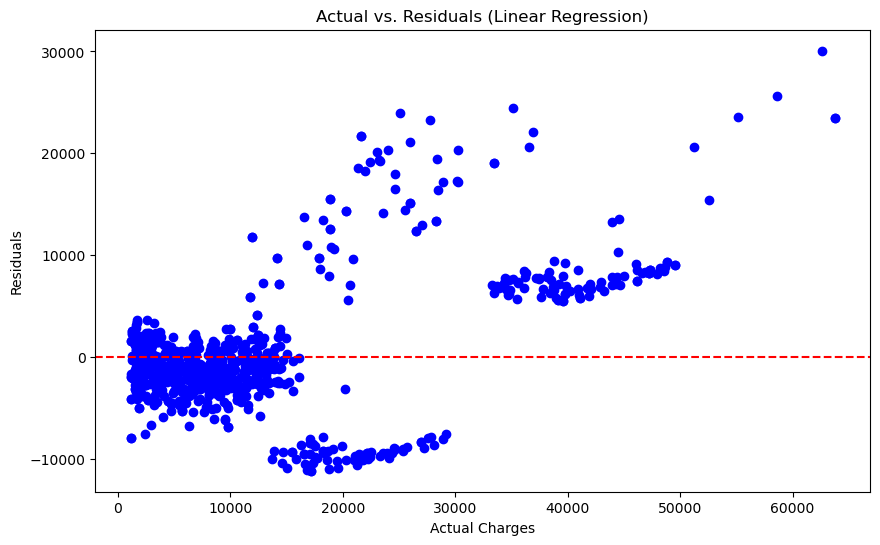

In [263]:
plt.scatter(y=test_df['residual'], x=test_df['charges'], color='blue')
plt.plot(color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals (Linear Regression)')
plt.show()


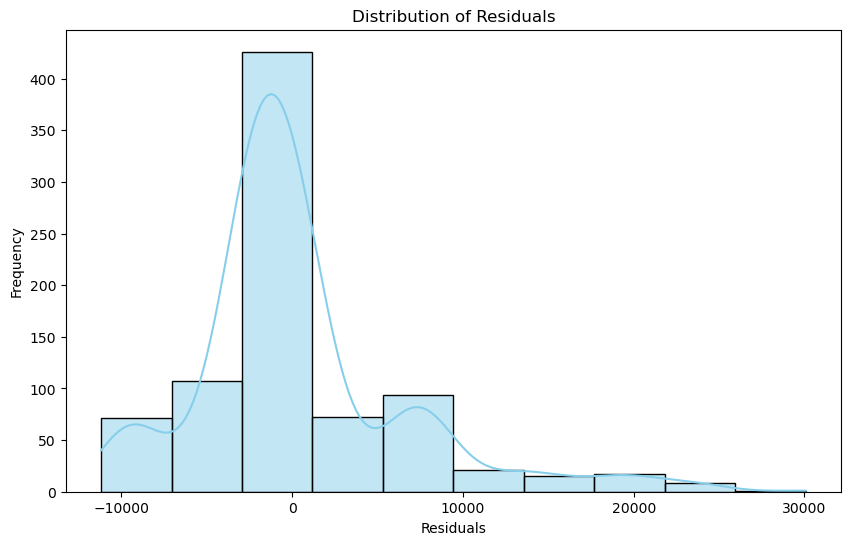

In [267]:
sns.histplot(test_df['residual'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Scale the cefficients
# Regulaization parameter
# Change test train split before scaling
# 